In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트

!unzip -qq "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO.zip"

/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트


In [ ]:
import numpy as np
import cv2
import requests
import os
import imutils
from PIL import Image
from tqdm.notebook import tqdm

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from random import shuffle

from PIL import Image
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *

In [ ]:
os.listdir('/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data')

['annotations.json',
 'batch_8',
 'batch_9',
 '.DS_Store',
 'batch_1',
 'batch_10',
 'batch_11',
 'batch_12',
 'batch_13',
 'batch_14',
 'batch_15',
 'batch_2',
 'batch_3',
 'batch_4',
 'batch_5',
 'batch_6',
 'batch_7']

# 데이터 확인

In [ ]:
import json

annotation_file_path = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/annotations.json'

with open(annotation_file_path, 'r') as f:
    taco_annotations = json.load(f)

In [ ]:
taco_annotations.keys()

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])

In [ ]:
taco_annotations['images']

[{'id': 0,
  'width': 1537,
  'height': 2049,
  'file_name': '000006.jpg',
  'license': None,
  'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png',
  'coco_url': None,
  'date_captured': None,
  'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'},
 {'id': 1,
  'width': 1537,
  'height': 2049,
  'file_name': '000008.jpg',
  'license': None,
  'flickr_url': 'https://farm66.staticflickr.com/65535/47803331152_ee00755a2e_o.png',
  'coco_url': None,
  'date_captured': None,
  'flickr_640_url': 'https://farm66.staticflickr.com/65535/47803331152_19beae025a_z.jpg'},
 {'id': 2,
  'width': 1537,
  'height': 2049,
  'file_name': '000010.jpg',
  'license': None,
  'flickr_url': 'https://farm66.staticflickr.com/65535/40888872753_08ffb24902_o.png',
  'coco_url': None,
  'date_captured': None,
  'flickr_640_url': 'https://farm66.staticflickr.com/65535/40888872753_631ab0f441_z.jpg'},
 {'id': 3,
  'width': 2049,
  'height': 1537,
  'fil

In [ ]:
import random

# Get a list of image IDs
image_ids = [image['id'] for image in taco_annotations['images']]

# Determine the number of images for the validation set
val_split = 0.2  # 20% for validation
num_val_images = int(len(image_ids) * val_split)

# Randomly shuffle the image IDs
random.shuffle(image_ids)

# Split the image IDs into training and validation sets
train_image_ids = image_ids[num_val_images:]
val_image_ids = image_ids[:num_val_images]

# Create lists for training and validation annotations
train_annotations = [ann for ann in taco_annotations['annotations'] if ann['image_id'] in train_image_ids]
val_annotations = [ann for ann in taco_annotations['annotations'] if ann['image_id'] in val_image_ids]

In [ ]:
train_data = {
    "images": [image for image in taco_annotations['images'] if image['id'] in train_image_ids],
    "annotations": train_annotations,
    "categories": taco_annotations['categories']
}

val_data = {
    "images": [image for image in taco_annotations['images'] if image['id'] in val_image_ids],
    "annotations": val_annotations,
    "categories": taco_annotations['categories']
}

# Save the training and validation annotation files
train_annotation_path = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_annotations.json'
val_annotation_path = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_annotations.json'

with open(train_annotation_path, 'w') as train_file:
    json.dump(train_data, train_file)

with open(val_annotation_path, 'w') as val_file:
    json.dump(val_data, val_file)

- images의 id = annotations의 image_id
- category의 id = annotations의 category_id

# Data Preprocessing

In [ ]:
ANNOTATIONS_PATH = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1'
os.listdir(ANNOTATIONS_PATH)

['000006.jpg',
 '000008.jpg',
 '000010.jpg',
 '000019.jpg',
 '000026.jpg',
 '000047.jpg',
 '000055.jpg',
 '000001.jpg',
 '000005.jpg',
 '000007.jpg',
 '000012.jpg',
 '000014.jpg',
 '000048.jpg',
 '000053.jpg',
 '000056.jpg',
 '000058.jpg',
 '000060.jpg',
 '000003.jpg',
 '000011.jpg',
 '000032.jpg',
 '000040.jpg',
 '000043.jpg',
 '000049.jpg',
 '000061.jpg',
 '000054.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000027.jpg',
 '000028.jpg',
 '000030.jpg',
 '000031.jpg',
 '000042.jpg',
 '000059.jpg',
 '000050.jpg',
 '000000.jpg',
 '000013.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000025.jpg',
 '000029.jpg',
 '000035.jpg',
 '000037.jpg',
 '000045.jpg',
 '000038.jpg',
 '000065.JPG',
 '000066.JPG',
 '000067.JPG',
 '000068.JPG',
 '000069.JPG',
 '000070.JPG',
 '000071.JPG',
 '000072.JPG',
 '000073.JPG',
 '000074.JPG',
 '000076.JPG',
 '000078.JPG',
 '000079.JPG',
 '000081.JPG',
 '000082.JPG',
 '000083.JPG',
 '000084.JPG',
 '000085.JPG',
 '000086.JPG',
 '000087.J

In [ ]:
ANNOTATION_FILE_VAL = (ANNOTATIONS_PATH + '/val_annotations.json')
ANNOTATION_FILE_TRAIN = (ANNOTATIONS_PATH + '/train_annotations.json')

In [ ]:
from pycocotools.coco import COCO

In [ ]:
taco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = taco_train.getCatIds() # Get all Categories ('horse','human' etc...)
imgIds_train = taco_train.getImgIds() # Get all image ID's (dict with path and annotations)
imgDict_train = taco_train.loadImgs(imgIds_train) # Func to load images from path
print(len(imgIds_train) , len(catIds_train))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
81 60


In [ ]:
taco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val =taco_val.getCatIds()
imgIds_val =taco_val.getImgIds()
imgDict_val =taco_val.loadImgs(imgIds_val)
print(len(imgIds_val) , len(catIds_val))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
20 60


In [ ]:
shuffle(imgIds_train) # randoms shuffling
shuffle(imgIds_val) # random shuffling

imgIds_train = imgIds_train[0:80]
imgIds_val = imgIds_val[0:20]

이미지 id와 이미지 파일 이름이 같지 않으므로 이것 관련해서 체크 필요할듯!!

In [ ]:
train_images = ["TACO_train_{0:012d}.jpg".format(ids) for ids in imgIds_train]
# keep aside train and val image names
val_images = ["TACO_val_{0:012d}.jpg".format(ids) for ids in imgIds_val]
print(len(train_images) , len(val_images))

80 20


In [ ]:
WORKING_DIR = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1'

os.chdir(WORKING_DIR)

In [ ]:
!mkdir mask_train

mkdir: cannot create directory ‘mask_train’: File exists


In [ ]:
count = 0
unfitted_image_dict = []
for ID in tqdm(imgIds_train):
    file_path = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_train'+"/{0:012d}.jpg".format(ID)
    # basic functionality is to take all masks, and create a unified mask
    sampleImgIds =taco_train.getImgIds(imgIds = [ID])
    sampleImgDict =taco_train.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]
    # take all annotations for all categories
    annIds =taco_train.getAnnIds(imgIds=sampleImgDict['id'],
                                catIds=catIds_train,
                                iscrowd=0)
    anns =taco_train.loadAnns(annIds)

    # separating images with background as the only mask
    if len(anns)==0:
        unfitted_image_dict.append(sampleImgDict)
    else:
        mask =taco_train.annToMask(anns[0])
        # unify all the masks provided
        for i in (range(len(anns))):
            mask = mask |taco_train.annToMask(anns[i])
        mask = Image.fromarray(mask * 255 , mode = "L")
        # save the mask
        mask.save(file_path)
        count = count + 1
print(count)

  0%|          | 0/80 [00:00<?, ?it/s]

80


In [ ]:
os.chdir(WORKING_DIR)

In [ ]:
!mkdir mask_val

mkdir: cannot create directory ‘mask_val’: File exists


In [ ]:
count = 0
unfitted_image_dict = []
for ID in tqdm(imgIds_val):
    file_path = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_val'+"/{0:012d}.jpg".format(ID)

    sampleImgIds = taco_val.getImgIds(imgIds = [ID])
    sampleImgDict = taco_val.loadImgs(sampleImgIds[np.random.randint(0,len(sampleImgIds))])[0]

    annIds = taco_val.getAnnIds(imgIds=sampleImgDict['id'],
                                catIds=catIds_val,
                                iscrowd=0)
    anns = taco_val.loadAnns(annIds)

    if len(anns)==0:
        unfitted_image_dict.append(sampleImgDict)
    else:
        mask = taco_val.annToMask(anns[0])

        for i in (range(len(anns))):
            mask = mask | taco_val.annToMask(anns[i])
        mask = Image.fromarray(mask * 255 , mode = "L")
        mask.save(file_path)
        count = count + 1
print(count)

  0%|          | 0/20 [00:00<?, ?it/s]

20


In [ ]:
os.chdir(WORKING_DIR)

In [ ]:
!mkdir train_data
!mkdir val_data

mkdir: cannot create directory ‘train_data’: File exists
mkdir: cannot create directory ‘val_data’: File exists


In [ ]:
import shutil

In [ ]:
imgIds_val

[94, 29, 82, 2, 1, 21, 49, 71, 26, 27, 97, 6, 12, 20, 22, 74, 54, 86, 52, 37]

In [ ]:
# 원본 이미지 디렉토리
original_image_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1"

# 대상 디렉토리
target_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data"

# 이미지 ID 목록을 반복하면서 이미지를 복사
for image_id in imgIds_train:
    # 이미지 파일 이름 찾기
    for image_info in taco_annotations['images']:
        if image_info['id'] == image_id:
            image_filename = image_info['file_name']
            break
    else:
        print(f"Image with ID {image_id} not found in annotations.")
        continue

    # 원본 이미지 경로
    source_image_path = os.path.join(original_image_dir, image_filename)

    # 대상 디렉토리에 이미지 복사
    if os.path.exists(source_image_path):
        target_image_path = os.path.join(target_dir, "{0:012d}.jpg".format(image_id))
        shutil.copy(source_image_path, target_image_path)
        print(f"Copied {image_filename} to {target_dir}")
    else:
        print(f"Image {image_filename} not found in {original_image_dir}")

print("Image copying complete.")

Copied 000082.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000127.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000026.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000068.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000035.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000038.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000021.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000000.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000017.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000102.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data
Copied 000094.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/d

In [ ]:
# 원본 이미지 디렉토리
original_image_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1"

# 대상 디렉토리
target_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data"

# 이미지 ID 목록을 반복하면서 이미지를 복사
for image_id in imgIds_val:
    # 이미지 파일 이름 찾기
    for image_info in taco_annotations['images']:
        if image_info['id'] == image_id:
            image_filename = image_info['file_name']
            break
    else:
        print(f"Image with ID {image_id} not found in annotations.")
        continue

    # 원본 이미지 경로
    source_image_path = os.path.join(original_image_dir, image_filename)

    # 대상 디렉토리에 이미지 복사
    if os.path.exists(source_image_path):
        target_image_path = os.path.join(target_dir, "{0:012d}.jpg".format(image_id))
        shutil.copy(source_image_path, target_image_path)
        print(f"Copied {image_filename} to {target_dir}")
    else:
        print(f"Image {image_filename} not found in {original_image_dir}")

print("Image copying complete.")

Copied 000121.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000027.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000104.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000010.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000008.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000043.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000067.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000093.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000022.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000023.jpg to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data
Copied 000124.JPG to /content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data

# Data Loader

In [ ]:
r1 = random.randint(0, 1)
r1

0

In [ ]:
class DataGen(keras.utils.Sequence):
    def __init__(self , path_input , path_mask , batch_size = 8 , image_size = 128):
        self.ids = os.listdir(path_mask) # only take those images that we have segregated masks of
        self.path_input = path_input
        self.path_mask = path_mask
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()

    def __load__(self , id_name):
        image_path = os.path.join(self.path_input , id_name)
        mask_path = os.path.join(self.path_mask , id_name)
        image = cv2.imread(image_path , 1) # 1 specifies RGB format
        image = cv2.resize(image , (self.image_size , self.image_size)) # resizing before inserting to the network
        mask = cv2.imread(mask_path , -1) # loads image with all channels
        mask = cv2.resize(mask , (self.image_size , self.image_size))
        mask = mask.reshape((self.image_size , self.image_size , 1))
        # normalize image
#         image = image / 255.0
        mask = mask / 255.0
        return image , mask

    def __getitem__(self , index):
        # used to create the last
        if (index + 1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index * self.batch_size
        file_batch = self.ids[index * self.batch_size : (index + 1) * self.batch_size]
        images = []
        masks = []

        # Function to normalize image
        def normalize_image(image, mean, std):
            for channel in range(3):
                image[:,:,channel] = (image[:,:,channel] - mean[channel]) / std[channel]
            return image

        # Function to add horizontal flips
        def horizontal_flip(image,mask):
            r = random.randint(0,1)
            image = image
            mask = mask
            if (r==1):
                image = np.fliplr(image)
                mask = np.fliplr(mask)
            return image,mask

        # We can add more augmentations for example


        for id_name in file_batch :
            # protected variables
            _img , _mask = self.__load__(id_name)
            # normalize the image using weights per ImageNet precalculated weights
            _img = normalize_image(np.array(_img) / 255.0,
                                      mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])
            # randomly horizontal flip image
            _img,_mask = horizontal_flip(_img,_mask)

            images.append(_img)
            masks.append(_mask)

        images = np.array(images)
        masks = np.array(masks)
        return images , masks

    def on_epoch_end(self):
        pass
    def __len__(self):
        return int(np.ceil(len(self.ids) / float(self.batch_size)))

In [ ]:
# use image size 128 for better results
image_size = 128
epochs = 10
batch_size = 10

In [ ]:
train_gen = DataGen(path_input = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data' , path_mask = '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_train' , batch_size = batch_size , image_size = image_size)
val_gen = DataGen(path_input =  '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data', path_mask =  '/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_val', batch_size = batch_size , image_size = image_size)

In [ ]:
x, y = val_gen.__getitem__(12)

In [ ]:
plt.imshow(x[1]) # just an example to show that the dataloader is working fine

IndexError: ignored

# Data Loader by GPT

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class DataGenerator(Sequence):
    def __init__(self, image_dir, mask_dir, batch_size, image_size, shuffle=True):
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
        self.mask_paths = [os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)]
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))

        # Data augmentation for images
        self.image_data_gen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='reflect'
        )

        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in indexes]
        batch_mask_paths = [self.mask_paths[i] for i in indexes]

        X, y = self.__data_generation(batch_image_paths, batch_mask_paths)

        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)


    def __data_generation(self, batch_image_paths, batch_mask_paths):
        X = np.empty((self.batch_size, *self.image_size, 3))
        y = np.empty((self.batch_size, *self.image_size, 1))

        for i in range(len(batch_image_paths)):
            image = cv2.imread(batch_image_paths[i])
            mask = cv2.imread(batch_mask_paths[i], cv2.IMREAD_GRAYSCALE)

        # Resize image and mask to target size
            image = cv2.resize(image, self.image_size)
            mask = cv2.resize(mask, self.image_size)

        # Data augmentation
            seed = np.random.randint(0, 9999)
            image = self.image_data_gen.random_transform(image, seed=seed)
            mask = self.image_data_gen.random_transform(mask[..., np.newaxis], seed=seed)  # Add an extra dimension

            X[i] = image / 255.0
            y[i] = mask / 255.0  # Assign the modified mask to y

        return X, y

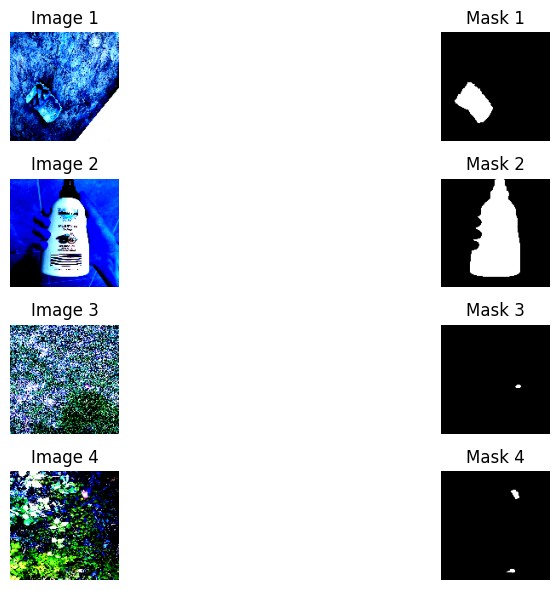

In [ ]:
import matplotlib.pyplot as plt

# Create a data generator for visualization
visualization_generator = DataGen(
    path_input='/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data',
    path_mask='/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_train',
    batch_size=4,  # Choose the batch size you want to visualize
    image_size=128,  # Use the same image size as your data generator
)

# Get a batch of images and masks
batch_images, batch_masks = visualization_generator[0]

# Visualize the batch
plt.figure(figsize=(12, 6))

for i in range(4):  # Change this to match your batch size
    plt.subplot(4, 2, i * 2 + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Image {i + 1}")
    plt.axis("off")

    plt.subplot(4, 2, i * 2 + 2)
    plt.imshow(batch_masks[i].squeeze(), cmap="gray")  # Squeeze the mask to remove the single-channel dimension
    plt.title(f"Mask {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Middle
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = concatenate([up4, conv2], axis=-1)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv1], axis=-1)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)

    model = Model(inputs, outputs)
    return model

#Train

In [ ]:
# Define image and mask directories
train_image_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/train_data"
train_mask_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_train"
val_image_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data"
val_mask_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_val"

# Define input image size
input_shape = (128, 128, 3)

# Create data generators
batch_size = 16
train_generator = DataGenerator(train_image_dir, train_mask_dir, batch_size, input_shape[:2])
val_generator = DataGenerator(val_image_dir, val_mask_dir, batch_size, input_shape[:2], shuffle=False)

# Create and compile the model
model = unet(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/10
5/5 [==============================] - 127s 25s/step - loss: 0.5698 - accuracy: 0.7032 - val_loss: nan - val_accuracy: 0.7322
Epoch 2/10
5/5 [==============================] - 117s 23s/step - loss: 0.4577 - accuracy: 0.8692 - val_loss: 0.4823 - val_accuracy: 0.9019
Epoch 3/10
5/5 [==============================] - 116s 23s/step - loss: 0.4177 - accuracy: 0.8668 - val_loss: 0.4608 - val_accuracy: 0.9025
Epoch 4/10
5/5 [==============================] - 116s 23s/step - loss: 0.4043 - accuracy: 0.8682 - val_loss: nan - val_accuracy: 0.5320
Epoch 5/10
5/5 [==============================] - 116s 23s/step - loss: 0.3928 - accuracy: 0.8701 - val_loss: nan - val_accuracy: 0.8794
Epoch 6/10
5/5 [==============================] - 122s 24s/step - loss: 0.3960 - accuracy: 0.8703 - val_loss: 0.3251 - val_accuracy: 0.9015
Epoch 7/10
5/5 [==============================] - 130s 27s/step - loss: 0.3803 - accuracy: 0.8687 - val_loss: nan - val_accuracy: 0.7388
Epoch 8/10
5/5 [================

In [ ]:
test_image_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/val_data"
test_mask_dir = "/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/mask_val"
test_generator = DataGenerator(test_image_dir, test_mask_dir, batch_size, input_shape[:2], shuffle=False)

evaluation = model.evaluate(test_generator)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

2/2 [==============================] - 12s 6s/step - loss: nan - accuracy: 0.6462
Test Loss: nan
Test Accuracy: 0.6462364196777344


In [ ]:
model.save("segmentation_model.keras")

In [ ]:
# Load and preprocess the input image
input_image = cv2.imread("/content/drive/MyDrive/DSL/2023_2/모델링 프로젝트/TACO/data/batch_1/000004.jpg")
input_image = cv2.resize(input_image, (128, 128))  # Resize to the model's input size
input_image = input_image / 255.0  # Normalize pixel values

In [ ]:
# Predict the mask for the input image
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

1/1 [==============================] - 0s 284ms/step


In [ ]:
threshold = 0.5  # Adjust the threshold as needed
binary_mask = (predicted_mask > threshold).astype(np.uint8)

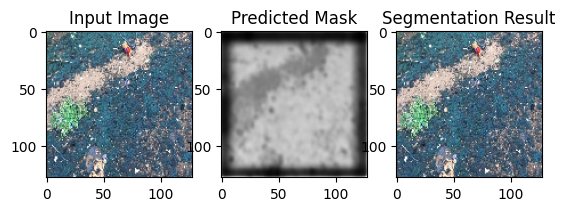

In [ ]:
# Display the input image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title("Input Image")

# Display the predicted mask
plt.subplot(1, 3, 2)
plt.imshow(predicted_mask.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
plt.title("Predicted Mask")

# Overlay the mask on the input image
overlay = input_image.copy()
binary_mask = binary_mask.squeeze()  # Squeeze to remove the channel dimension

# Ensure dimensions match and overlay the mask
overlay[binary_mask == 1] = [0, 255, 0]  # Green color for segmented regions
plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Segmentation Result")

plt.show()